In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [4]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows

labels_csv = pd.read_csv("/Users/natashapashupathi/Downloads/labels.csv")
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


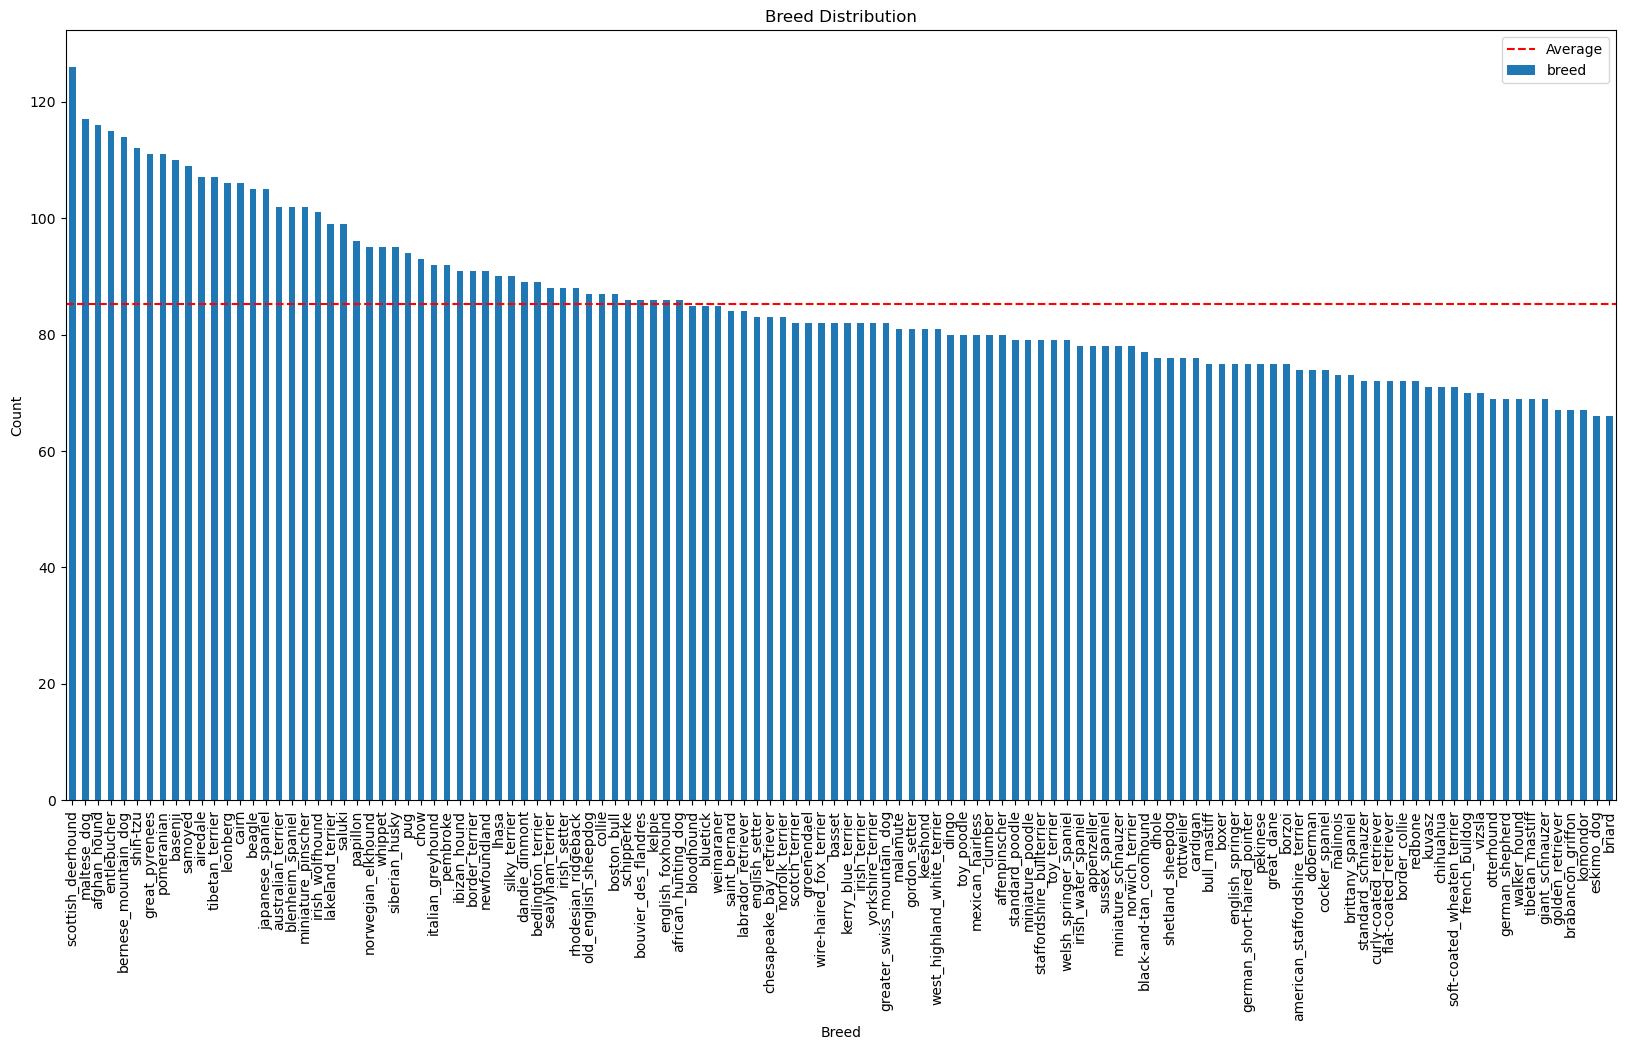

In [3]:
# Plot the bar chart
ax = labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

# Calculate the average value
average_value = labels_csv["breed"].value_counts().mean()

# Add the average line
ax.axhline(average_value, color='red', linestyle='--', label='Average')

# Customize the plot as desired
plt.xlabel('Breed')
plt.ylabel('Count')
plt.title('Breed Distribution')
plt.legend();

In [5]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
#filter out the breeds wanted
filtered_df = labels_csv[labels_csv['breed'].isin(["rottweiler", "basset", "boston_bull", "dingo", "great_dane"])]


In [7]:
filtered_df.describe()

,id,breed
count,400,400
unique,400,5
top,000bec180eb18c7604dcecc8fe0dba07,boston_bull
freq,1,87


In [8]:
import os
import shutil
import pandas as pd


# Directory paths
source_dir = '/Users/natashapashupathi/Downloads/train'
destination_dir = '/Users/natashapashupathi/Downloads/new_train'

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Iterate over the files in the source directory
for file_name in os.listdir(source_dir):
    # Get the file name without the extension
    file_id = os.path.splitext(file_name)[0]
    
    # Check if the file_id is in the id column of the labels_csv
    if file_id in filtered_df['id'].values:
        # Construct full file paths
        source_file = os.path.join(source_dir, file_name)
        destination_file = os.path.join(destination_dir, file_name)
        
        # Copy the file to the new folder
        shutil.copy(source_file, destination_file)

print("Files have been copied successfully.")


Files have been copied successfully.


In [9]:
filenames = []
for image_id in filtered_df["id"]:
    filenames.append("/Users/natashapashupathi/Downloads/new_train/"+image_id+".jpg")


In [10]:
if len(os.listdir("/Users/natashapashupathi/Downloads/new_train")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


In [11]:
#convert the breed column to a numpy array
labels = filtered_df['breed'].to_numpy()

In [12]:
labels

array(['boston_bull', 'dingo', 'dingo', 'boston_bull', 'dingo', 'basset',
       'dingo', 'basset', 'dingo', 'basset', 'basset', 'boston_bull',
       'dingo', 'boston_bull', 'basset', 'great_dane', 'dingo', 'basset',
       'boston_bull', 'great_dane', 'basset', 'dingo', 'basset', 'dingo',
       'basset', 'boston_bull', 'great_dane', 'basset', 'boston_bull',
       'rottweiler', 'dingo', 'rottweiler', 'basset', 'boston_bull',
       'great_dane', 'boston_bull', 'basset', 'boston_bull', 'dingo',
       'boston_bull', 'dingo', 'rottweiler', 'rottweiler', 'great_dane',
       'rottweiler', 'great_dane', 'boston_bull', 'basset', 'great_dane',
       'rottweiler', 'boston_bull', 'rottweiler', 'rottweiler', 'basset',
       'boston_bull', 'rottweiler', 'rottweiler', 'rottweiler',
       'great_dane', 'great_dane', 'rottweiler', 'basset', 'basset',
       'basset', 'rottweiler', 'great_dane', 'boston_bull', 'basset',
       'dingo', 'boston_bull', 'rottweiler', 'boston_bull', 'boston_bull',

In [13]:
if len(filenames) == len(labels):
    print("No missing Data")
else: 
    print("There is missing data !")

No missing Data


In [14]:
unique_breeds = filtered_df['breed'].unique()
print(labels[5])
labels[5] == unique_breeds

basset


array([False, False,  True, False, False])

In [15]:
boolean_labels = []

for label in labels:
    boolean_labels.append(label == unique_breeds)

In [16]:
boolean_labels

[array([ True, False, False, False, False]),
 array([False,  True, False, False, False]),
 array([False,  True, False, False, False]),
 array([ True, False, False, False, False]),
 array([False,  True, False, False, False]),
 array([False, False,  True, False, False]),
 array([False,  True, False, False, False]),
 array([False, False,  True, False, False]),
 array([False,  True, False, False, False]),
 array([False, False,  True, False, False]),
 array([False, False,  True, False, False]),
 array([ True, False, False, False, False]),
 array([False,  True, False, False, False]),
 array([ True, False, False, False, False]),
 array([False, False,  True, False, False]),
 array([False, False, False,  True, False]),
 array([False,  True, False, False, False]),
 array([False, False,  True, False, False]),
 array([ True, False, False, False, False]),
 array([False, False, False,  True, False]),
 array([False, False,  True, False, False]),
 array([False,  True, False, False, False]),
 array([Fa

In [17]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [18]:
len(filenames)

400

In [19]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(320, 320, 80, 80)

In [20]:
from matplotlib.pyplot import imread


image = imread(filenames[56])
image.shape

(500, 333, 3)

In [21]:
tensor = tf.io.read_file(filenames[20])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01N\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [22]:
tensor = tf.image.decode_jpeg(tensor, channels=3)
tensor

<tf.Tensor: shape=(334, 500, 3), dtype=uint8, numpy=
array([[[151, 110,  92],
        [134,  93,  75],
        [ 37,   0,   0],
        ...,
        [ 49,   4,   9],
        [ 49,   4,   9],
        [ 48,   3,   8]],

       [[ 93,  52,  32],
        [ 70,  32,  13],
        [ 39,   0,   0],
        ...,
        [ 42,   1,   5],
        [ 42,   1,   5],
        [ 41,   0,   4]],

       [[ 86,  48,  25],
        [ 36,   0,   0],
        [ 42,   4,   0],
        ...,
        [ 31,   1,   1],
        [ 31,   1,   1],
        [ 31,   1,   1]],

       ...,

       [[200, 180, 171],
        [201, 181, 172],
        [202, 182, 173],
        ...,
        [198, 174, 174],
        [197, 173, 173],
        [196, 172, 172]],

       [[201, 181, 172],
        [201, 181, 172],
        [202, 182, 173],
        ...,
        [188, 164, 164],
        [186, 162, 162],
        [185, 161, 161]],

       [[208, 188, 179],
        [207, 187, 178],
        [205, 185, 176],
        ...,
        [181, 157, 15

In [23]:
tf.image.convert_image_dtype(tensor, tf.float32)


<tf.Tensor: shape=(334, 500, 3), dtype=float32, numpy=
array([[[0.5921569 , 0.43137258, 0.36078432],
        [0.5254902 , 0.3647059 , 0.29411766],
        [0.14509805, 0.        , 0.        ],
        ...,
        [0.19215688, 0.01568628, 0.03529412],
        [0.19215688, 0.01568628, 0.03529412],
        [0.18823531, 0.01176471, 0.03137255]],

       [[0.3647059 , 0.20392159, 0.1254902 ],
        [0.27450982, 0.1254902 , 0.0509804 ],
        [0.15294118, 0.        , 0.        ],
        ...,
        [0.16470589, 0.00392157, 0.01960784],
        [0.16470589, 0.00392157, 0.01960784],
        [0.16078432, 0.        , 0.01568628]],

       [[0.3372549 , 0.18823531, 0.09803922],
        [0.14117648, 0.        , 0.        ],
        [0.16470589, 0.01568628, 0.        ],
        ...,
        [0.12156864, 0.00392157, 0.00392157],
        [0.12156864, 0.00392157, 0.00392157],
        [0.12156864, 0.00392157, 0.00392157]],

       ...,

       [[0.7843138 , 0.7058824 , 0.67058825],
        [0.78

In [24]:
IMG_SIZE = 224

def preprocess_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file path and turns it into a Tensor
    """
    
    # 1. Read an image:
    image = tf.io.read_file(image_path)
    # 2. Turn it into Numerical Tensor using 3 channels: RGB
    image = tf.image.decode_jpeg(image, channels=3)
    # 3. Normalization: Convert these 0-255 into 0-1 for each RGB
    image = tf.image.convert_image_dtype(image, tf.float32)
    # 4. Resize to our desired size: (224,224)
    image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
    # 5. Return
    return image

In [27]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Create a simple function to return a tuple (image, label).
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = preprocess_image(image_path)
  return image, label

In [28]:
# Create a function to make batches:
BATCH_SIZE = 32

def create_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates batches of data out of image (X) and label (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
    Also accepts test data as input (no labels).
    """
    if test_data: # NO LABELS SINCE TEST
        print("Creating Test Data Batches...")
        data_whole = tf.data.Dataset.from_tensor_slices((tf.constant(X),))
        data_batch = data_whole.map(preprocess_image).batch(BATCH_SIZE)
        return data_batch
    
    elif valid_data: # NO SHUFFLING REQUIRED
        print("Creating Valid Data Batches...")
        data_whole = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data_whole.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    
    else: # TRAINING SET: SHUFFLING ALSO REQUIRED
        print("Creating Training Data Batches...")
        data_whole = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data_whole.shuffle(buffer_size=len(X)).map(get_image_label).batch(BATCH_SIZE)
        return data_batch

In [29]:
# Creating training and validation Sets
train_data = create_batches(X_train, y_train)
val_data = create_batches(X_val , y_val, valid_data=True)

Creating Training Data Batches...
Creating Valid Data Batches...


In [30]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
    """
    Displays 25 images from a data batch.
    """
    # Setup the figure
    plt.figure(figsize=(10, 10))
    # Loop through 25 (for displaying 25 images)
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn gird lines off
        plt.axis("off")

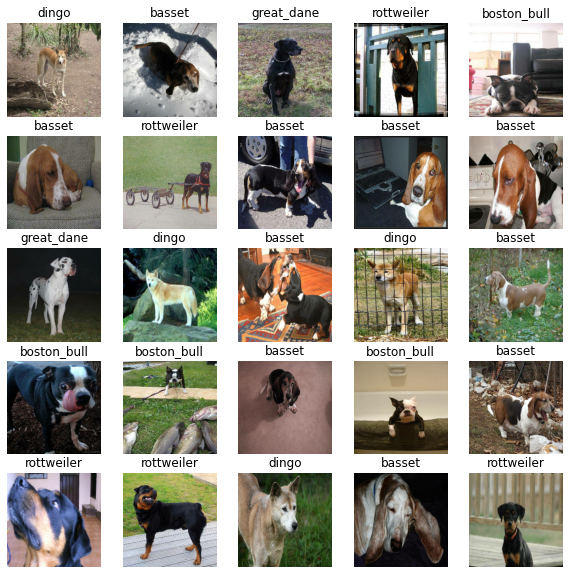

In [31]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

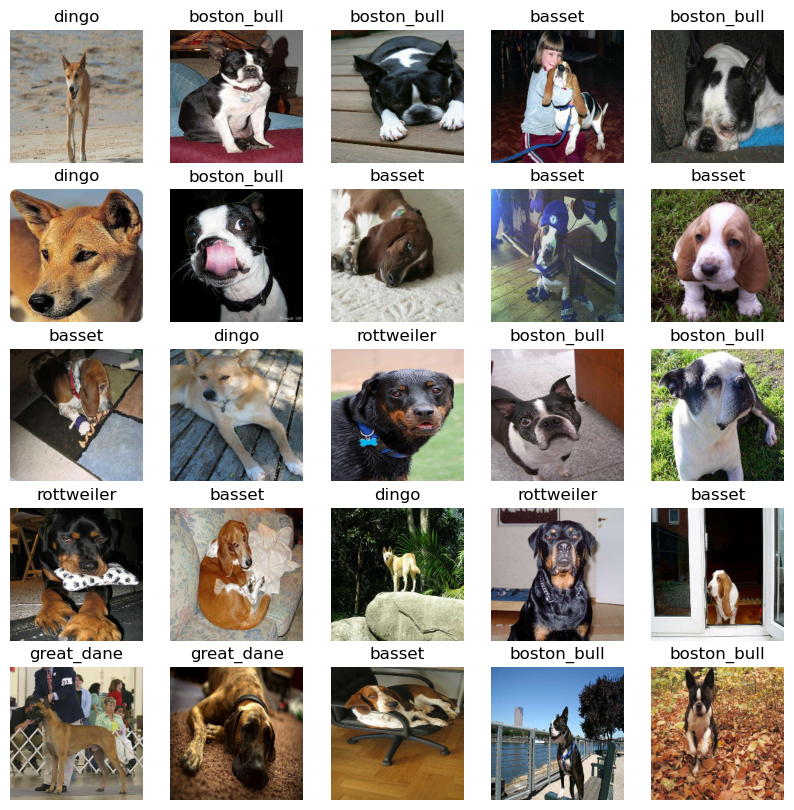

In [63]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [32]:
# Shape of our images
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, height, width, color channels

# Shape of our labels
OUTPUT_SHAPE = len(unique_breeds)

# Setup a model URL
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [33]:
import tensorflow as tf
import tensorflow_hub as hub

# Define constants
INPUT_SHAPE = [None, 224, 224, 3]  # Example input shape, adjust as necessary
OUTPUT_SHAPE = 120  # Number of classes, adjust as necessary
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4"  # Example URL, adjust as necessary

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building a Model with the url:", model_url)

    # Setup the Keras layers: Instantiating the model
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url, input_shape=input_shape[1:]),  # LAYER1: INPUT LAYER
        tf.keras.layers.Dense(units=output_shape, activation="softmax")  # LAYER2: OUTPUT LAYER
    ])

    # Compiling the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    return model

model = create_model()
model.summary()


Building a Model with the url: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 3660505 (13.96 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________
